In [ ]:
def cepstrum_implement(x):
    

In [8]:
import numpy as np
import math
p = np.poly1d([1,2,3])
print(p)

   2
1 x + 2 x + 3


In [113]:
p.r

array([-1.+1.41421356j, -1.-1.41421356j])

In [3]:
L = 200 
c1 = 0
c2 = 50
seq = np.array([1,3,2,3,1])
x = np.zeros(L)
x[c1:c1+len(seq)] = x[c1:c1+len(seq)]+seq*20
x[c2:c2+len(seq)] = x[c2:c2+len(seq)]+seq*10
p = np.poly1d(x)
roots = p.r

In [4]:
N = 300
n_positive = np.arange(1,N+1).astype(np.float64)
n_negative = np.arange(-N,0).astype(np.float64)

cep_positive = np.arange(N+1,N+1+N)
cep_negative = np.arange(0,N)
cep = np.zeros(2*N+1).astype(np.complex128)

In [5]:
minimum = 1e-6
A = x[x>minimum][0]
for value in roots:
    if abs(value) > minimum:
        if abs(value) < 1+minimum:
            cep[cep_positive] = cep[cep_positive]-np.power(value, n_positive)/n_positive
        else:
            cep[cep_negative] = cep[cep_negative]+np.power(1/value, -n_negative)/n_negative
            A = A*value
cep[N] = np.log(A)

<IPython.core.display.Javascript object>


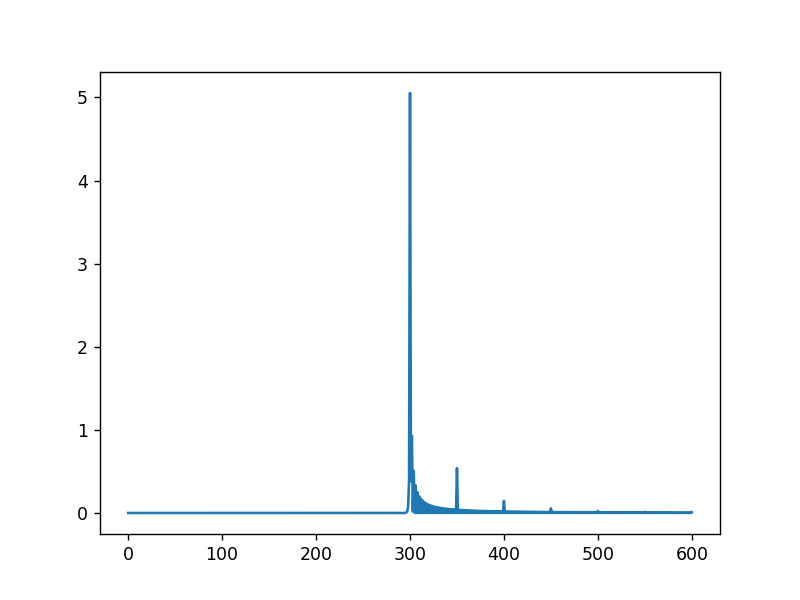

In [6]:
import matplotlib.pyplot as plt 
%matplotlib notebook
plt.plot(abs(cep))

In [9]:
cep1 = cep
num = 300//50
index = np.linspace(50, 50+(num-1)*50, num=num, endpoint=True).astype(np.int64)
cep1[N+index] = 0

Lm = 300
Lm1 = L*2+1
flt = 1
gm = np.array([math.gamma(i+1) for i in range(100)])
gm = np.concatenate((gm, np.ones(Lm-99)*gm[-1]))
for a2 in range(N):
    a21 = N-a2
    if abs(cep1[a2])>minimum:
        ff = np.zeros(Lm+1).astype(np.complex128)
        md = Lm//a21
        index = np.linspace(0,0+a21*md,num=md+1,endpoint=True).astype(np.int64)
        ff[index] = np.power(cep1[a2],np.arange(md+1))/gm[:md+1]
        flt = np.convolve(flt,ff)
        flt = flt[:Lm+1]

exp_x = flt[np.arange(300,-1,-1)]*np.exp(cep1[N])
xa = np.concatenate((exp_x, np.zeros(Lm)))
for a3 in range(1,N+1):
    a31 = N+a3
    if abs(cep1[a31])>minimum:
        ff = np.zeros(Lm+1).astype(np.complex128)
        md = Lm//a3
        index = np.linspace(0,0+a3*md,num=md+1,endpoint=True).astype(np.int64)
        ff[index]=np.power(cep1[a31],np.arange(md+1))/gm[:md+1]
        xa = np.convolve(xa,ff)
        xa = xa[:Lm1]

<IPython.core.display.Javascript object>


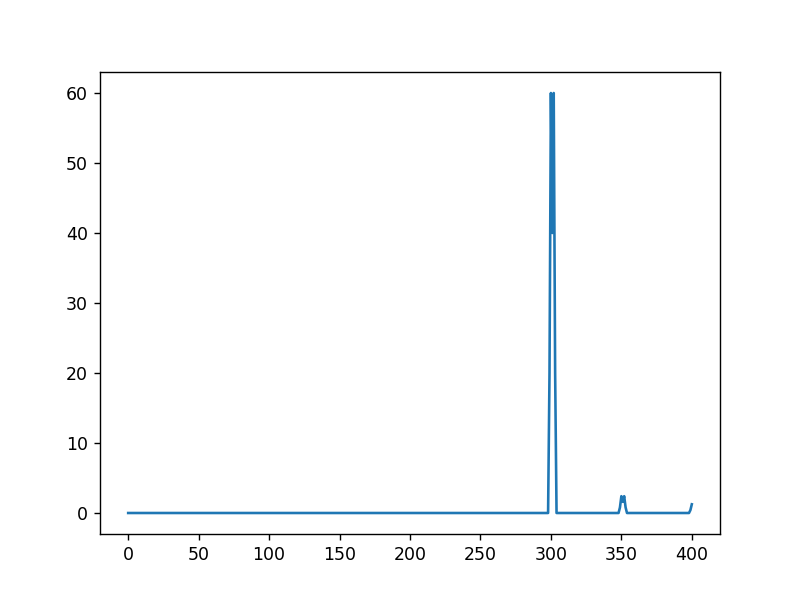

<IPython.core.display.Javascript object>


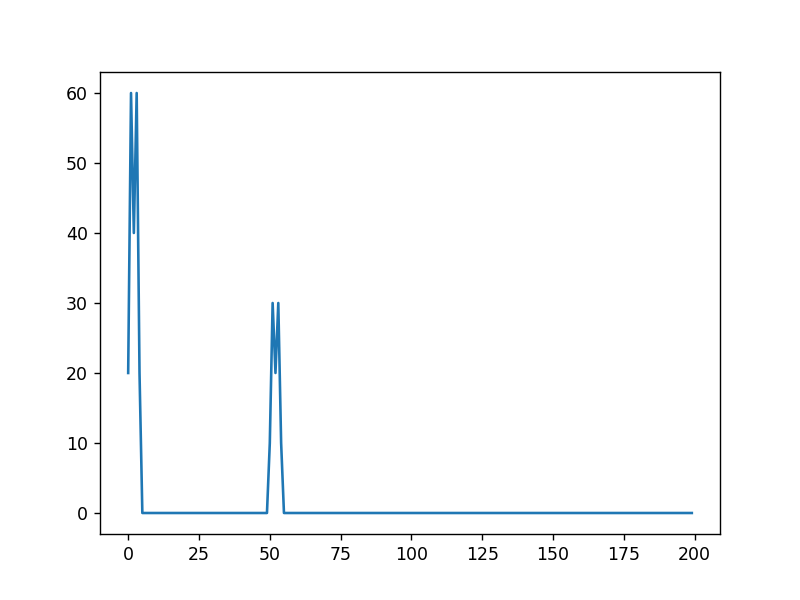

In [10]:
fig, ax = plt.subplots()
ax.plot(abs(xa))
fig, ax = plt.subplots()
ax.plot(abs(x))